<a href="https://colab.research.google.com/github/brunomoraisnc/neural-networks-challenge/blob/master/Neural_Networks_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESAFIO
## Bruno Morais Neves de Castro

# Sobre o dataset
O dataset é composto por 130 amostras de indivíduos neurologicamente saudáveis e com Doença de Parkinson, sendo classificados como:
- 0: indivíduos neurologicamente saudáveis
- 1: indivíduos com Doença de Parkinson

Para classificação, são utilizadas 408 características. As três com maior desvio-padrão serão separadas para treinamento e teste, bem como a coluna Class, que representa a classificação de cada amostra.

Por fim, será calculada a precisão da arquitetura.



# Imports

In [0]:
import numpy as np
import pandas as pd

# Divisor de treino-teste e Classificador
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Métricas
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

# Gráfico
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

%matplotlib inline

C:\Users\BM\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Leitura de arquivo e análise primária

In [0]:
# DataFrame.read_csv() para leitura do arquivo CSV
df = pd.read_csv('dataset.csv')

# DataFrame.head() pra visualização das primeiras 5 linhas
df.head()

,Sample,Class,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,...,Feat399,Feat400,Feat401,Feat402,Feat403,Feat404,Feat405,Feat406,Feat407,Feat408
0,1,0,0.848430,0.976769,2.119157,0.401087,0.391817,0.209463,0.199892,1.711195,...,0.000180,0.521561,0.000022,7663.368074,0.000013,0.000052,0.000256,0.000042,1.731288e-09,0.840290
1,2,0,0.890184,1.027493,2.448104,0.417791,0.429628,0.207055,0.218954,1.823011,...,0.000357,0.593006,0.000036,5828.760675,0.000021,0.000071,0.000459,0.000060,3.629933e-09,0.882876
2,3,0,0.678620,0.813339,3.022167,0.447307,0.364194,0.283599,0.188001,1.319033,...,0.000283,0.585712,0.000031,6796.401968,0.000019,0.000054,0.000382,0.000053,2.840904e-09,0.707318
3,4,0,0.732323,0.846803,2.151257,0.393228,0.333159,0.236892,0.170046,1.388155,...,0.000231,0.656882,0.000033,7577.451642,0.000020,0.000059,0.000347,0.000051,2.577860e-09,1.085987
4,5,0,0.784659,0.892075,1.972922,0.370282,0.330593,0.211374,0.168490,1.627952,...,0.000314,0.645609,0.000048,5212.056293,0.000028,0.000083,0.000458,0.000074,5.461302e-09,1.095683


In [0]:
df.tail()

,Sample,Class,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,...,Feat399,Feat400,Feat401,Feat402,Feat403,Feat404,Feat405,Feat406,Feat407,Feat408
125,126,0,0.569157,0.682674,2.063113,0.423187,0.289064,0.333461,0.155585,1.090291,...,0.000429,0.326235,0.000043,1373.053576,0.000024,0.000205,0.000733,0.000133,1.756993e-08,0.819280
126,127,0,0.501284,0.613063,2.231598,0.493062,0.302094,0.445738,0.167325,0.923001,...,0.000340,0.259205,0.000036,1023.295014,0.000020,0.000239,0.000598,0.000139,1.926374e-08,0.690093
127,128,0,0.642330,0.743330,2.391205,0.386707,0.287513,0.276608,0.152903,1.314005,...,0.000611,0.340910,0.000042,1536.575225,0.000024,0.000171,0.000843,0.000124,1.537096e-08,0.827274
128,129,0,0.608932,0.710863,1.730564,0.369910,0.263210,0.283049,0.143309,1.223391,...,0.000550,0.235875,0.000046,668.175357,0.000025,0.000315,0.000856,0.000195,3.800515e-08,0.636331
129,130,0,0.509642,0.599982,1.592072,0.392971,0.235870,0.357336,0.128737,1.015288,...,0.000405,0.298547,0.000038,1347.289354,0.000021,0.000183,0.000640,0.000126,1.583946e-08,0.745375


In [0]:
# Apresenta a forma do dataframe (linhas, colunas)
print('-> O dataset apresenta %s linhas e %s colunas' % (df.shape[0], df.shape[1]))

-> O dataset apresenta 130 linhas e 410 colunas


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 410 entries, Sample to Feat408
dtypes: float64(408), int64(2)
memory usage: 416.5 KB


In [0]:
df.describe()

,Sample,Class,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,...,Feat399,Feat400,Feat401,Feat402,Feat403,Feat404,Feat405,Feat406,Feat407,Feat408
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,130.000000
mean,65.500000,0.615385,0.592610,0.710024,2.149688,0.476573,0.335603,0.456709,0.181947,1.110362,...,0.000485,0.674909,0.000087,3759.917748,0.000051,0.000184,0.000835,0.000142,3.038975e-08,0.962892
std,37.671829,0.488386,0.245061,0.282331,0.842607,0.172285,0.161663,0.345127,0.087964,0.494658,...,0.000481,0.279323,0.000044,2268.586194,0.000026,0.000100,0.000662,0.000101,8.076238e-08,0.237337
min,1.000000,0.000000,0.119649,0.164174,0.536380,0.236233,0.063104,0.167250,0.033213,0.185097,...,0.000144,0.136910,0.000014,111.275258,0.000008,0.000011,0.000230,0.000030,8.718087e-10,0.267001
25%,33.250000,0.000000,0.415391,0.500463,1.469270,0.370003,0.221992,0.247132,0.118044,0.752947,...,0.000317,0.422467,0.000046,1842.965762,0.000025,0.000128,0.000584,0.000098,9.646321e-09,0.807635
50%,65.500000,1.000000,0.609830,0.729982,2.134605,0.428900,0.329895,0.326057,0.178006,1.124824,...,0.000389,0.704491,0.000089,3676.042069,0.000053,0.000168,0.000695,0.000123,1.525041e-08,1.036417
75%,97.750000,1.000000,0.737808,0.882975,2.634550,0.505998,0.437823,0.532868,0.232032,1.387620,...,0.000529,0.915883,0.000116,5266.909375,0.000068,0.000233,0.000939,0.000165,2.707022e-08,1.148405
max,130.000000,1.000000,1.361999,1.569427,5.111346,1.018624,0.841293,1.878176,0.436771,2.619333,...,0.005311,1.237924,0.000192,10543.302620,0.000110,0.000593,0.006908,0.000884,7.807907e-07,1.365530


In [0]:
# Checar se há colunas com quantidade de amostra diferente de 130
linhaCount = df.describe().loc['count', :]
print(linhaCount[linhaCount != 130])
print('-> Não há colunas com quantidade de amostra diferente de 130')

Series([], Name: count, dtype: float64)
-> Não há colunas com quantidade de amostra diferente de 130


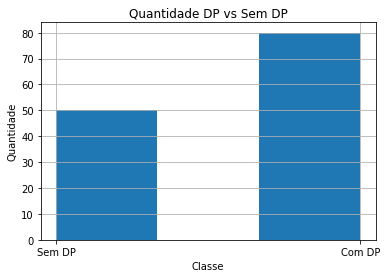

In [0]:
# Quantidade de indivíduos com o sem Doença de Parkinson
classe = df.loc[:, 'Class'].values

plt.clf()

plt.hist(classe, bins=3)
plt.xticks([0,1], ('Sem DP', 'Com DP'));

plt.title('Quantidade DP vs Sem DP')
plt.xlabel('Classe')
plt.ylabel('Quantidade')

plt.grid(True)

plt.show()

# Data Cleaning

In [0]:
# Para deletar a coluna sample:
df.drop(axis=1, columns='Sample', inplace=True)

# Observação:
# após a primeira execução, pode apresentar erro, pois a coluna Sample é deletada inplace.

In [0]:
# Deletar linha duplicada
df.drop_duplicates(inplace=True)
print(df.shape)

(130, 409)


In [0]:
# Para coletar o desvio-padrão por coluna
planilha = df.describe()

# Separação dos índices de média (mean) e desvio-padrão (std)
indices = ['mean', 'std']

# Seleção de linhas atribuídas na variável indices e todas as colunas do dataframe, exceto Class
planilhaMediaSTD = planilha.loc[indices, :]
planilhaMediaSTD.drop(axis=1, columns='Class', inplace=True)

In [0]:
# Para salvar em CSV:
#
# planilhaMediaSTD.to_csv('desvio_padrao_e_media.csv', sep=',')

In [0]:
# Para checar se há valores negativos
print('Valor mínimo da linha min: {}'.format(min(planilha.loc['min',:])))

if min(planilha.loc['min',:]) >= 0:
    print('-> Não há valor negativo')
else:
    print('-> Há valor negativo')

Valor mínimo da linha min: 0.0
-> Não há valor negativo


In [0]:
# Para descobrir quais as colunas com maior desvio-padrão
planilhaMediaSTD.sort_values(axis=1, by='std', ascending=False)

,Feat342,Feat402,Feat354,Feat294,Feat390,Feat366,Feat246,Feat306,Feat318,Feat378,...,Feat299,Feat335,Feat311,Feat323,Feat395,Feat383,Feat359,Feat371,Feat347,Feat407
mean,1223.825146,3759.917748,858.977468,783.661128,2208.712808,593.899584,855.595786,476.655168,352.901401,415.126172,...,2.733366e-07,3.178240e-07,2.142201e-07,3.032842e-07,7.477859e-08,2.027164e-07,1.290015e-07,1.306024e-07,1.116671e-07,3.038975e-08
std,3464.299694,2268.586194,2138.170952,1373.010706,1333.804523,1193.475014,753.684160,700.882629,631.881333,571.035836,...,4.743192e-07,4.007942e-07,3.212362e-07,2.946497e-07,1.838228e-07,1.730343e-07,1.443134e-07,1.287825e-07,1.205603e-07,8.076238e-08


In [0]:
# Para checar se a Feat342 é a maior mesmo
planilhaMediaSTD.loc['std',:].max()

3464.299693954662

In [0]:
# Feat342, Feat402 e Feat354 têm os maiores stds
caracterMaiorDP = ['Feat342', 'Feat402','Feat354']
# dfFinal, com as amostras de características de maior desvio-padrão e coluna Class
dfFinal = df.loc[:, caracterMaiorDP + ['Class']]
dfFinal

,Feat342,Feat402,Feat354,Class
0,278.603665,7663.368074,273.043531,0
1,460.635378,5828.760675,344.151819,0
2,244.536630,6796.401968,236.495586,0
3,410.106465,7577.451642,301.223799,0
4,358.100538,5212.056293,268.112779,0
5,1205.262212,5113.544354,1463.103586,0
6,503.661400,7852.142007,711.997036,0
7,538.914202,6877.352030,1962.727798,0
8,1002.043556,7524.091627,1301.954902,0
9,856.115456,7479.312365,1628.868332,0


# Separação de X e y

In [0]:
X = dfFinal.iloc[:, 0:3]
X.head()

,Feat342,Feat402,Feat354
0,278.603665,7663.368074,273.043531
1,460.635378,5828.760675,344.151819
2,244.536630,6796.401968,236.495586
3,410.106465,7577.451642,301.223799
4,358.100538,5212.056293,268.112779


In [0]:
# .values para transformar para numpy array, que acelera os cálculos
y = dfFinal.loc[:,'Class'].values

print('Tipo de dado de y: %s \n' % type(y))
print('Valores de y:')
print(y)

Tipo de dado de y: <class 'numpy.ndarray'> 

Valores de y:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]


# Normalização

## Fórmula de normalização:
X = (X - X.min())/(X.max() - X.min())

In [0]:
print('Executando normalização...')

X = (X - X.min(axis=0))/(X.max(axis=0) - X.min(axis=0))
X.head()

print('Normalização finalizada!')

Executando normalização...
Normalização finalizada!


### Checagem de MÍNIMO e MÁXIMO

In [0]:
print('Mínimo:')
print(X.min())

print('Máximo:')
print(X.max())

Mínimo:
Feat342    0.0
Feat402    0.0
Feat354    0.0
dtype: float64
Máximo:
Feat342    1.0
Feat402    1.0
Feat354    1.0
dtype: float64


# Separação Treino e Teste
- Treino: 70%
- Teste: 30%

In [0]:
print('Separando valores de treino e teste...')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

print('Treino e teste foram separados em:')

Separando valores de treino e teste...
Treino e teste foram separados em:


In [0]:
# Checando a forma de cada elemento (linha, colunas)

print('Treino:')
print(X_train.shape)
print(y_train.shape)

print('\nTeste:')
print(X_test.shape)
print(y_test.shape)

Treino:
(91, 3)
(91,)

Teste:
(39, 3)
(39,)


# Função para testar várias arquiteturas

In [0]:
def testarClassificadorMLP(ativador, otimizador, epocas=2000, momentumm=0.9, taxaAprendizagem='constant'):
    '''
    FUNÇÃO testarClassificadorMLP
    
    DESCRIÇÃO:
    Função para testar precisão (em Erro Quadrático Médio - EQM) com diversas quantidades de tuplas em uma camada intermediária.
    É possível, também, determinar arquiteturas e outros parâmetros do classificador sklearn.neural_network.MLPClassifier da biblioteca Scikit-learn.
    
    ENTRADAS:
    - ativador:  {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
        define a função de ativação a ser percorrida.

    - otimizador: {‘lbfgs’, ‘sgd’, ‘adam’'}
        define o otimizador que será utilizado

    - épocas: (DEFAULT=2000)
        Para otimizadores 'sgd' e 'adam', define o número de épocas
        Para outros, define o número de iterações

    - momentum: [float de 0 a 1] (DEFAULT=0.9)
        define a taxa de momentum.

    - taxaDeAprendizagem: [float de 0 a 1] (DEFAULT='constant')
        define a taxa de aprendizagem.
    
    SAÍDAS (void):
    Apresenta a performance de cada formato de tupla.
    
    PARA MAIORES INFORMAÇÕES:
    http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    
    AUTOR: BRUNO MORAIS NEVES DE CASTRO
    
    '''
    
    listaEQMTeste = []
    listaEQMTreino = []

    for i in range(1,25):
        clf = MLPClassifier(activation=ativador, solver=otimizador, hidden_layer_sizes=(i, ), random_state=21, max_iter=epocas, momentum=momentumm, learning_rate=taxaAprendizagem)
        #print('\n{} tupla(s) na camada\n'.format(i))

        #mediaCrossValidation = np.mean(cross_val_score(clf, X, y, cv=5))

        #print('Média Cross-validation: {}'.format(mediaCrossValidation))

        clf.fit(X_train, y_train)

        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)

        EQM_treino = mean_squared_error(y_train, y_pred_train)
        EQM_teste = mean_squared_error(y_test, y_pred_test)

        score = clf.score(X_test,y_test)

        #print('Score de Teste: {}'.format(score))
        #print('EQM de Treino: {}'.format(EQM_treino))
        #print('EQM de Teste: {}'.format(EQM_teste))

        listaEQMTeste.append(EQM_teste)
        listaEQMTreino.append(EQM_treino)

    minListaEQMTeste = np.min(np.array(listaEQMTeste))
    minListaEQMTreino = np.min(np.array(listaEQMTreino))
    print('\n######################################################')
    print('Ativador [{}] e otimizador [{}]'.format(ativador, otimizador))
    print('Mínimo EQM Teste: {}'.format(minListaEQMTeste))
    print('Mínimo EQM Treino: {}'.format(minListaEQMTreino))
    print('######################################################')

# Cálculo de Erro Quadrático Médio para diversas arquiteturas

### Sigmoidal (Logistic)

In [0]:
testarClassificadorMLP(ativador='logistic', otimizador='lbfgs')
# 5


######################################################
Ativador [logistic] e otimizador [lbfgs]
Mínimo EQM Teste: 0.07692307692307693
Mínimo EQM Treino: 0.0
######################################################


In [0]:
testarClassificadorMLP(ativador='logistic', otimizador='sgd')


######################################################
Ativador [logistic] e otimizador [sgd]
Mínimo EQM Teste: 0.38461538461538464
Mínimo EQM Treino: 0.38461538461538464
######################################################


In [0]:
testarClassificadorMLP(ativador='logistic', otimizador='adam')


######################################################
Ativador [logistic] e otimizador [adam]
Mínimo EQM Teste: 0.38461538461538464
Mínimo EQM Treino: 0.38461538461538464
######################################################


### Rectified (ReLU)

In [0]:
testarClassificadorMLP(ativador='relu', otimizador='lbfgs')
# 11, 14, 17, 19


######################################################
Ativador [relu] e otimizador [lbfgs]
Mínimo EQM Teste: 0.10256410256410256
Mínimo EQM Treino: 0.04395604395604396
######################################################


In [0]:
testarClassificadorMLP(ativador='relu', otimizador='sgd')


######################################################
Ativador [relu] e otimizador [sgd]
Mínimo EQM Teste: 0.38461538461538464
Mínimo EQM Treino: 0.37362637362637363
######################################################


In [0]:
testarClassificadorMLP(ativador='relu', otimizador='adam')


######################################################
Ativador [relu] e otimizador [adam]
Mínimo EQM Teste: 0.15384615384615385
Mínimo EQM Treino: 0.13186813186813187
######################################################


### Tangente Hiperbólica (tanh)

In [0]:
testarClassificadorMLP(ativador='tanh', otimizador='lbfgs')
# 6, 13


######################################################
Ativador [tanh] e otimizador [lbfgs]
Mínimo EQM Teste: 0.1282051282051282
Mínimo EQM Treino: 0.0
######################################################


In [0]:
testarClassificadorMLP(ativador='tanh', otimizador='sgd')


######################################################
Ativador [tanh] e otimizador [sgd]
Mínimo EQM Teste: 0.2564102564102564
Mínimo EQM Treino: 0.2857142857142857
######################################################


In [0]:
testarClassificadorMLP(ativador='tanh', otimizador='adam')


######################################################
Ativador [tanh] e otimizador [adam]
Mínimo EQM Teste: 0.1794871794871795
Mínimo EQM Treino: 0.27472527472527475
######################################################


# CÁLCULO DE PRECISÃO

## Arquiteturas com melhores scores:
- Ativador [tanh] e otimizador [lbfgs]
- Ativador [relu] e otimizador [lbfgs]
- Ativador [logistic] e otimizador [lbfgs]

Os demais argumentos estão na função testarClassificadorMLP() criada.

In [0]:
clfTanhLBFGS = MLPClassifier(activation='tanh', solver='lbfgs', hidden_layer_sizes=(6, ), random_state=21, max_iter=2000)
clfTanhLBFGS.fit(X_train, y_train)
precisao = clfTanhLBFGS.score(X_test, y_test)

print('\nAtivador [tanh] e otimizador [lbfgs]')
print('Precisão: {} %'.format(precisao * 100))


Ativador [tanh] e otimizador [lbfgs]
Precisão: 87.17948717948718 %


In [0]:
clfReluLBFGS = MLPClassifier(activation='relu', solver='lbfgs', hidden_layer_sizes=(11, ), random_state=21, max_iter=2000)
clfReluLBFGS.fit(X_train, y_train)
precisao = clfReluLBFGS.score(X_test, y_test)

print('\nAtivador [relu] e otimizador [lbfgs]')
print('Precisão: {} %'.format(precisao * 100))


Ativador [relu] e otimizador [lbfgs]
Precisão: 89.74358974358975 %


In [0]:
clfLogisticLBFGS = MLPClassifier(activation='logistic', solver='lbfgs', hidden_layer_sizes=(5, ), random_state=21, max_iter=2000)
clfLogisticLBFGS.fit(X_train, y_train)
precisao = clfLogisticLBFGS.score(X_test, y_test)

print('\nAtivador [logistic] e otimizador [lbfgs]')
print('Precisão: {} %'.format(precisao * 100))


Ativador [logistic] e otimizador [lbfgs]
Precisão: 92.3076923076923 %


# Gráfico de Precisão

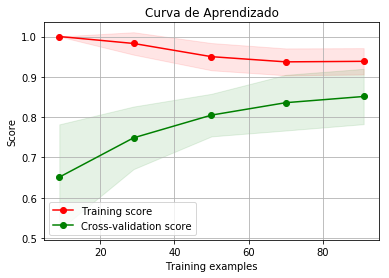

In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.grid(True)
    plt.legend(loc="best")
    return plt

title = "Curva de Aprendizado"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=21)
plot_learning_curve(clfLogisticLBFGS, title, X, y, cv=cv, n_jobs=4)

plt.show()

# Relato

A pesquisa, além de oportunizar o aprendizado, proporcionou imensa satisfação. Para a fase de limpeza de dados e divisão de características (X) e classe (y), o domínio da biblioteca pandas acelerou bastante o processo. Após a separação treino-teste e a normalização dos dados, procurei, então, não me ater somente aos passos mínimos, e resolvi extrapolar à procura das melhores arquiteturas que o classificador Multi-layer Perceptron (MLP) da biblioteca Scikit-learn poderia proporcionar, o que resultou na composição da função testarClassificadorMLP() para cálculo do Erro Quadrático Mínimo e Cross-validation de cada uma. Com isso, foi possível descobrir com qual quantidade de neurônios cada uma retornaria o melhor score com os 30% reservados para teste.

O otimizador lbfgs, definido na documentação como sendo da família de métodos quasi-Newton, apresentou bons resultados com todas as funções de ativação. Aparentemente, ele retorna melhores resultados em datasets pequenos.

O algoritmo utilizado para plotagem do gráfico foi o único de fonte externa, retirado da própria documentação do scikit-learn. Ainda assim, pequenas adaptações foram feitas.

Por fim, estou ciente da necessidade de conceitos estatísticos e mais métricas para validação, e me empenharei para aprender tudo isso.

Atenciosamente,

Bruno Morais Neves de Castro.

# ~FIM